In [1]:
import pandas as pd
import numpy as np
from scipy.stats import gmean
import matplotlib.pyplot as plt
import sqlite3

In [2]:
from utils.etimodel import ETIModel

## Data Preparation

In [3]:
_4dm4_connection = sqlite3.connect("dataset/4dm4.db")

_4dm4_scores_query = """SELECT scores.player_name, player_data.player_id, scores.round, 
scores.beatmap_type, scores.beatmap_tag, scores.score, scores.score_logit 
FROM scores LEFT JOIN player_data ON scores.player_name = player_data.player_name 
WHERE beatmap_type != \"SV\""""

_4dm4_data = pd.read_sql(_4dm4_scores_query, _4dm4_connection)

In [4]:
_4dm4_data

,player_name,player_id,round,beatmap_type,beatmap_tag,score,score_logit
0,drag_,17959501,Q,RC,1,980590,3.922366
1,JPBenedictGame,12304092,Q,RC,1,991778,4.792686
2,iVALORUS,12096188,Q,RC,1,950399,2.952871
3,BL5,13187997,Q,RC,1,994054,5.119073
4,-Tebo-,12092659,Q,RC,1,994631,5.221730
...,...,...,...,...,...,...,...
2760,MisteurFR,14055233,GF,TB,1,932066,2.618867
2761,Gray Hardrock,9049282,GF,TB,1,908730,2.298226
2762,--Pavin--,12046267,GF,TB,1,919303,2.432914
2763,shokoha,14134289,GF,TB,1,910134,2.315272


In [5]:
from utils.tables import get_table_from_records

In [6]:
_4dm4_data['beatmap'] = _4dm4_data['round'] + "_" + _4dm4_data['beatmap_type'] + "_" + _4dm4_data['beatmap_tag'].astype(str)

_4dm4_table = get_table_from_records(_4dm4_data, 'player_name', 'beatmap', 'score_logit')

In [7]:
_4dm4_table

beatmap,F_HB_1,F_HB_2,F_HB_3,F_LN_1,F_LN_2,F_LN_3,F_RC_1,F_RC_2,F_RC_3,F_RC_4,...,SF_LN_1,SF_LN_2,SF_LN_3,SF_RC_1,SF_RC_2,SF_RC_3,SF_RC_4,SF_RC_5,SF_RC_6,SF_TB_1
player_name,,,,,,,,,,,,,,,,,,,,,
--Pavin--,3.403862,4.130791,4.297121,NaN,NaN,3.972358,NaN,4.405308,4.181753,NaN,...,NaN,NaN,NaN,4.640350,NaN,NaN,4.738713,3.727061,3.925312,NaN
-Guille,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-Julio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-Pauze-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-SparklingCat-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
terror67890,NaN,NaN,NaN,3.500324,3.159003,2.650601,NaN,NaN,NaN,NaN,...,NaN,3.215677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
twitch chat,NaN,NaN,NaN,NaN,NaN,NaN,3.277534,NaN,NaN,NaN,...,NaN,NaN,NaN,3.417435,NaN,NaN,3.774716,NaN,NaN,NaN
u8_sunflower,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
def get_beatmap_category_table(records: pd.DataFrame, category: str):
    return get_table_from_records(records[records['beatmap_type'] == category], 'player_name', 'beatmap', 'score_logit')

In [9]:
rc = get_beatmap_category_table(_4dm4_data, "RC")
hb = get_beatmap_category_table(_4dm4_data, "HB")
ln = get_beatmap_category_table(_4dm4_data, "LN")

In [10]:
model = ETIModel()

rc_eti = pd.DataFrame(model.fit(rc.values), index=rc.index)
hb_eti = pd.DataFrame(model.fit(hb.values), index=hb.index)
ln_eti = pd.DataFrame(model.fit(ln.values), index=ln.index)

In [11]:
# cats are cute thank you

eti_cats = pd.DataFrame(index=_4dm4_table.index)
eti_cats['rc'] = rc_eti
eti_cats['hb'] = hb_eti
eti_cats['ln'] = ln_eti

In [12]:
eti_cats['rc'] = eti_cats['rc'].fillna(eti_cats['rc'].min())
eti_cats['hb'] = eti_cats['hb'].fillna(eti_cats['hb'].min())
eti_cats['ln'] = eti_cats['ln'].fillna(eti_cats['ln'].min())

In [13]:
eti_cats['avg'] = eti_cats[['rc', 'hb', 'ln']].mean(axis=1)

In [14]:
eti_cats.sort_values('avg', ascending=False).head(15)

,rc,hb,ln,avg
player_name,,,,
shokoha,13.800475,16.002318,11.771773,13.858188
Gray Hardrock,9.813089,7.393662,5.832745,7.679832
henryalexbr,10.742226,6.027675,3.608870,6.792923
Keskidi,7.761650,6.341447,5.417697,6.506931
MisteurFR,12.868501,6.537193,0.077601,6.494432
--Pavin--,10.552292,5.994294,2.561290,6.369292
[LS]Byte,6.109905,4.784302,5.775860,5.556689
Lazereed,3.525644,5.745385,7.231756,5.500929
RaGe Radical,5.406968,3.998066,5.864148,5.089728


In [15]:
eti_cats.describe()

,rc,hb,ln,avg
count,200.000000,200.000000,200.000000,200.000000
mean,-0.186545,-0.317289,-0.538190,-0.347341
std,2.884474,2.281047,2.299378,2.239531
min,-2.664934,-1.922962,-2.290171,-2.292689
25%,-2.136033,-1.630638,-2.290171,-1.862312
50%,-1.151135,-1.151389,-1.534880,-1.101743
75%,0.741682,0.011877,0.323441,0.368657
max,13.800475,16.002318,11.771773,13.858188


In [16]:
np.corrcoef(eti_cats[['rc', 'hb', 'ln']].T)

array([[1.        , 0.78591662, 0.55408699],
       [0.78591662, 1.        , 0.82335173],
       [0.55408699, 0.82335173, 1.        ]])

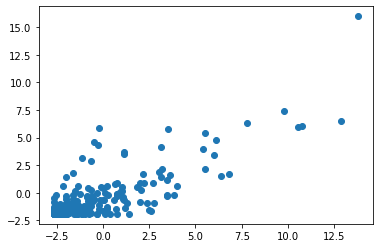

In [17]:
plt.scatter(eti_cats['rc'], eti_cats['hb'])

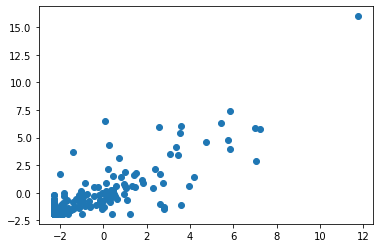

In [18]:
plt.scatter(eti_cats['ln'], eti_cats['hb'])

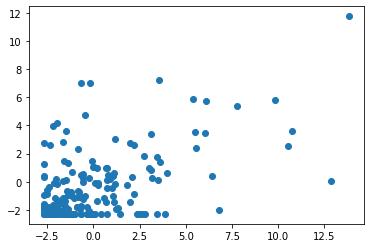

In [19]:
plt.scatter(eti_cats['rc'], eti_cats['ln'])

In [20]:
def regression_function(x, y):
    xbar = np.mean(x)
    ybar = np.mean(y)
    b1 = np.sum((x - xbar) * (y - ybar)) / np.sum((x - xbar) ** 2)
    b0 = ybar - b1 * xbar
    print(b1, b0)
    return lambda x: b1 * x + b0

In [21]:
rc_hb = regression_function(eti_cats['rc'].values, eti_cats['hb'].values)
ln_hb = regression_function(eti_cats['ln'].values, eti_cats['hb'].values)

0.6215041761987381 -0.20135003307100346
0.8167878626203217 0.12229851127576075


In [22]:
x_rc, y_rc = (-2.5, 15), (rc_hb(-2.5), rc_hb(15))
x_ln, y_ln = (-2.5, 12.5), (ln_hb(-2.5), ln_hb(12.5))

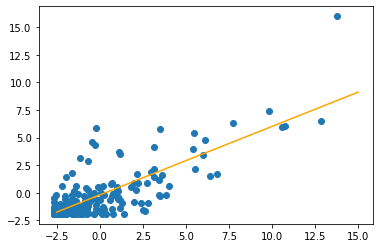

In [23]:
plt.scatter(eti_cats['rc'], eti_cats['hb'])
plt.plot(x_rc, y_rc, c='orange')
plt.show()

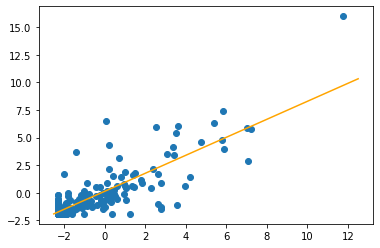

In [24]:
plt.scatter(eti_cats['ln'], eti_cats['hb'])
plt.plot(x_ln, y_ln, c='orange')
plt.show()

0.4416941561420335 -0.4557942658235187


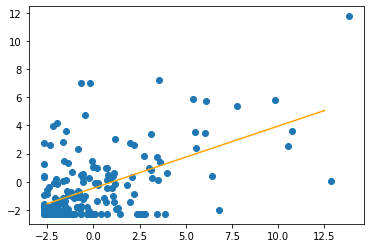

In [35]:
rc_ln = regression_function(eti_cats['rc'].values, eti_cats['ln'].values)
x_rc_ln, y_rc_ln = (-2.5, 12.5), (rc_ln(-2.5), rc_ln(12.5))
plt.scatter(eti_cats['rc'], eti_cats['ln'])
plt.plot(x_rc_ln, y_rc_ln, c='orange')
plt.show()

In [25]:
from scipy.stats import shapiro

def residual(y_true, y_pred):
    return y_true - y_pred

residual_rc = residual(eti_cats['hb'].values, rc_hb(eti_cats['rc'].values))
residual_ln = residual(eti_cats['hb'].values, ln_hb(eti_cats['ln'].values))

(array([ 11.,  22., 101.,  45.,   9.,   5.,   3.,   2.,   1.,   1.]),
 array([-3.10923457, -2.03564962, -0.96206467,  0.11152028,  1.18510524,
         2.25869019,  3.33227514,  4.40586009,  5.47944505,  6.55303   ,
         7.62661495]),
 <BarContainer object of 10 artists>)

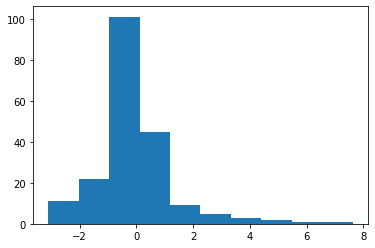

In [26]:
plt.hist(residual_rc)

(array([  4.,   5.,  11., 108.,  53.,   9.,   5.,   2.,   1.,   2.]),
 array([-4.13337338, -3.08488498, -2.03639659, -0.9879082 ,  0.0605802 ,
         1.10906859,  2.15755699,  3.20604538,  4.25453377,  5.30302217,
         6.35151056]),
 <BarContainer object of 10 artists>)

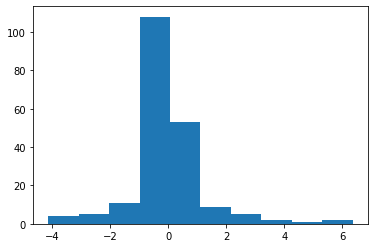

In [27]:
plt.hist(residual_ln)

In [28]:
shapiro(residual_rc)

ShapiroResult(statistic=0.8388686776161194, pvalue=1.278129891420926e-13)

In [29]:
shapiro(residual_ln)

ShapiroResult(statistic=0.8186289668083191, pvalue=1.6223105148214893e-14)

(array([146.,  29.,   9.,   7.,   7.,   1.,   0.,   0.,   0.,   1.]),
 array([-1.92296226, -0.13043426,  1.66209375,  3.45462175,  5.24714976,
         7.03967776,  8.83220577, 10.62473377, 12.41726178, 14.20978978,
        16.00231779]),
 <BarContainer object of 10 artists>)

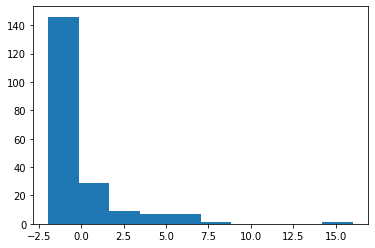

In [30]:
plt.hist(eti_cats['hb'].values)

(array([104.,  42.,  25.,  15.,   4.,   4.,   1.,   1.,   2.,   2.]),
 array([-2.66493418, -1.01839326,  0.62814766,  2.27468859,  3.92122951,
         5.56777043,  7.21431135,  8.86085227, 10.50739319, 12.15393412,
        13.80047504]),
 <BarContainer object of 10 artists>)

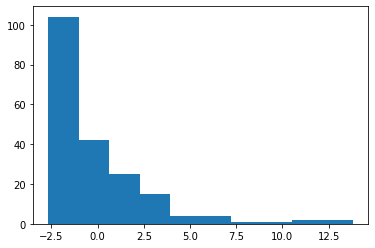

In [31]:
plt.hist(eti_cats['rc'].values)

(array([120.,  37.,  18.,   9.,   7.,   5.,   3.,   0.,   0.,   1.]),
 array([-2.29017139, -0.88397698,  0.52221742,  1.92841183,  3.33460623,
         4.74080063,  6.14699504,  7.55318944,  8.95938384, 10.36557825,
        11.77177265]),
 <BarContainer object of 10 artists>)

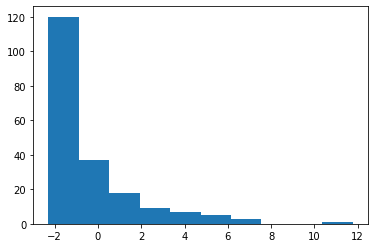

In [32]:
plt.hist(eti_cats['ln'].values)

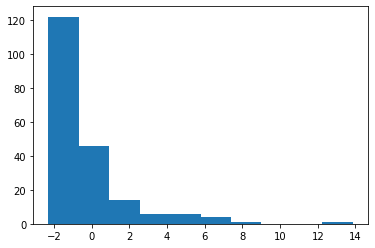

In [34]:
plt.hist(eti_cats['avg'])
plt.show()